# Image Analysis Project

### Initialization of Images 

In [1]:
import glob
import cv2
import time

images = [cv2.imread(file) for file in glob.glob("/Users/kat/VCU Engineering/Image Analysis/Project/Cancerous cell smears/*.BMP")]

In [2]:
print((images[90].shape))

(568, 768, 3)


## Grayscale

In [3]:
def gray_scale(image):
    new_image = []
    
    for x in range(0, len(image)):              # for x in range (0,568)
        pixel_collection = []
        for y in range(0, len(image[0])):          # for y in range (0,768)
            p_value = (int(image[x][y][0]) + int(image[x][y][1]) + int(image[x][y][2])) // 3
            pixel_collection.append(p_value)
        new_image.append(pixel_collection)

    return new_image

In [4]:
def gray_all(images):
    gray_images = []
    for i in range(0, len(images)):
        if i != 289:
            gray_images.append(gray_scale(images[i]))
    return gray_images


In [5]:
import time

start_gray = time.perf_counter()
gray_images = gray_all(images)
end_gray = time.perf_counter()

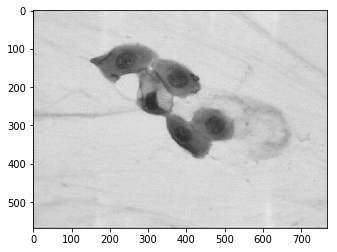

In [7]:
from matplotlib import pyplot as plt

plt.imshow(gray_images[4], cmap='gray')

In [8]:
gray_total_time = end_gray - start_gray
gray_per_img = gray_total_time / 499

print("Batch processing time: ", gray_total_time)
print("Per image processing time: ", gray_per_img)

Batch processing time:  591.449735894
Per image processing time:  1.1852700118116233


## Noise Addition: Salt and Pepper Noise of User-Specified Strength

In [9]:
import random

def salt_and_pepper(image, strength):
    img = []
    
    bow = 0
    
    for x in range(0, len(image)):              # for x in range (0,568)
        row = []
        for y in range(0, len(image[0])):          # for y in range (0,768)
            number = random.random()
            #print(number)
            if number <= strength:
                #make pixel black or white
                if bow == 0:
                    value = 0
                    bow = 1
                else:
                    value = 255
                    bow = 0
            else:
                value = image[x][y]
            row.append(value)
        img.append(row)
            
    return img
    


In [10]:
def salt_and_pepper_all(images, strength):
    salted_images = []
    for i in range(0, len(images)):
            salted_images.append(salt_and_pepper(images[i], strength))
    return salted_images

In [11]:
start_salt = time.perf_counter()
salted_images = salt_and_pepper_all(gray_images, 0.05)
end_salt = time.perf_counter()

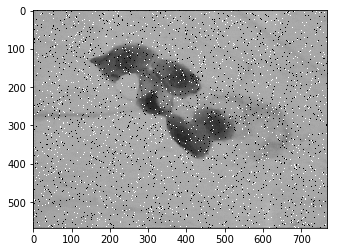

In [13]:
plt.imshow(salted_images[4], cmap='gray')

In [14]:
salt_total_time = end_salt - start_salt
salt_per_img = salt_total_time / 499

print("Batch processing time: ", salt_total_time)
print("Per image processing time: ", salt_per_img)

Batch processing time:  78.48412410500009
Per image processing time:  0.15728281383767553


## Noise Addition: Gaussian Noise of User-Specified Strength

In [15]:
import numpy as np

def gaussian_noise(image, stdev):
    gaussian_nums = np.random.randn(len(image), len(image[0])) * stdev
    gaussian_img = image + gaussian_nums
    normalized = ((gaussian_img - gaussian_img.min()) * 255) / (gaussian_img.max() - gaussian_img.min())
    normalized = normalized.astype(int)
    
    return normalized


In [16]:
def gaussian_noise_all(images, stdev):
    gaussian_images = []
    for i in range(0, len(images)):
            gaussian_images.append(gaussian_noise(images[i], stdev))
    return gaussian_images

In [17]:
start_gaussian = time.perf_counter()
gaussian_images = gaussian_noise_all(gray_images, 30)
end_gaussian = time.perf_counter()

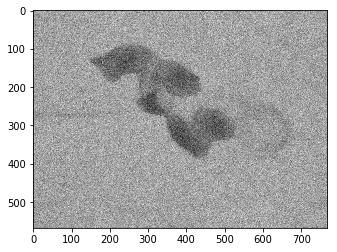

In [18]:
plt.imshow(gaussian_images[4], cmap='gray')

In [19]:
gaussian_total_time = end_gaussian - start_gaussian
gaussian_per_img = gaussian_total_time / 499

print("Batch processing time: ", gaussian_total_time)
print("Per image processing time: ", gaussian_per_img)

Batch processing time:  29.65631754700007
Per image processing time:  0.0594314980901805


## Histogram Calculation for Each Individual Image

In [20]:
def get_histogram(image):
    buckets = []
    for i in range(0,256):
        buckets.append(0)
        
    for x in range(0, len(image)):              # for x in range (0,568)
        for y in range(0, len(image[0])):          # for y in range (0,768)
            buckets[image[x][y]] += 1
            
    return buckets

In [21]:
def get_histogram_all(gray_images):
    raw_histograms = []
    for i in range(0, len(gray_images)):
        raw_histograms.append(get_histogram(gray_images[i]))
    return raw_histograms

In [22]:
start_hist = time.perf_counter()
all_histograms = get_histogram_all(gray_images)
end_hist = time.perf_counter()

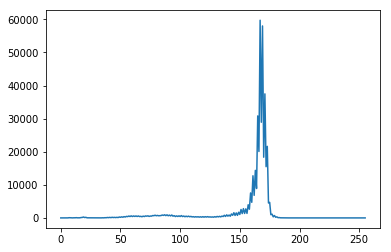

In [23]:
plt.plot(all_histograms[4])

In [24]:
hist_total_time = end_hist - start_hist
hist_per_img = hist_total_time / 499

print("Batch processing time: ", hist_total_time)
print("Per image processing time: ", hist_per_img)

Batch processing time:  37.35645800700013
Per image processing time:  0.07486264129659344


## Averaged Histograms of Pixel Values for Each Class of Images

In [25]:
'''
• 50 columnar epithelial cells
• 50 parabasal squamous epithelial cells
• 50 intermediate squamous epithelial cells
• 50 superficial squamous epithelial cells
• 100 mild nonkeratinizing dysplastic cells (99)
• 100 moderate nonkeratinizing dysplastic cells
• 100 severe nonkeratinizing dysplastic cells 
'''

def average_histograms(images):
    ### initialize arrays ###
    one = []
    two = []
    three = []
    four = []
    five = []
    six = []
    seven = []
    
    for i in range(0,256):
        one.append(0)
        two.append(0)
        three.append(0)
        four.append(0)
        five.append(0)
        six.append(0)
        seven.append(0)
        
    for i in range(len(images)):
        if i < 50:
            for a in range(0,len(one)):
                one[a] += images[i][a] / 50
        if i >= 50 and i < 100:
            for b in range(0,len(two)):
                two[b] += images[i][b] / 50
        if i >= 100 and i < 150:
            for c in range(0, len(three)):
                three[c] += images[i][c] / 50
        if i >= 150 and i < 200:
            for d in range(0, len(four)):
                four[d] += images[i][d] / 50
        if i >= 200 and i < 299:
            for e in range(0, len(five)):
                five[e] += images[i][e] / 99
        if i >= 299 and i < 399:
            for f in range(0, len(six)):
                six[f] += images[i][f] / 50
        if i >= 399 and i < 499:
            for g in range(0, len(seven)):
                seven[g] += images[i][g] / 50
    
    
    return one, two, three, four, five, six, seven

In [26]:
start_hist_avg = time.perf_counter()
a, b, c, d, e, f, g = average_histograms(all_histograms)
end_hist_avg = time.perf_counter()

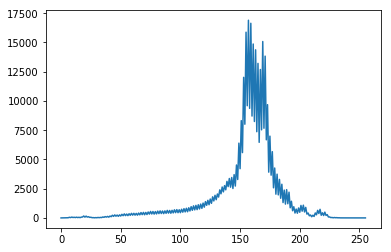

In [27]:
plt.plot(a)

In [28]:
avg_hist_total_time = end_hist_avg - start_hist_avg
avg_hist_per_img = avg_hist_total_time / 499

print("Batch processing time: ", avg_hist_total_time)
print("Per image processing time: ", avg_hist_per_img)

Batch processing time:  0.026476739999907295
Per image processing time:  5.305959919821101e-05


## Histogram Equalization for Each Image

In [29]:
def histogram_equalization(hist, image):
    #get cumulative sum of histogram
    cumulative = []
    cum_sum = 0
    
    for i in range(0,len(hist)):
        cum_sum += hist[i]
        cumulative.append(int(cum_sum))
    
    # normalize
    normalized = []
    
    for i in range(0,len(cumulative)):
        norm_value = int(((cumulative[i] - cumulative[0])*255) / (cumulative[-1] - cumulative[0]))
        normalized.append(norm_value)
    
    new_image = []
    for x in range(0, len(image)):              # for x in range (0,568)
        row = []
        for y in range(0, len(image[0])):          # for y in range (0,768)
            new_value = normalized[image[x][y]] 
            row.append(new_value)
        new_image.append(row)
    

    return new_image
    
    

In [30]:
def histogram_equalization_all(histograms, gray_images):
    equalized_histograms = []
    for i in range(0, len(gray_images)):
        equalized_histograms.append(histogram_equalization(histograms[i], gray_images[i]))
    return equalized_histograms

In [33]:
start_hist_eq = time.perf_counter()
all_equalized = histogram_equalization_all(all_histograms, gray_images)
end_hist_eq = time.perf_counter()

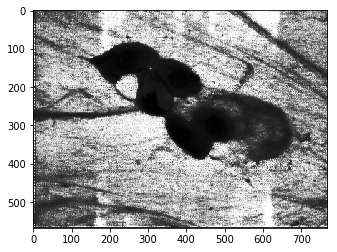

In [34]:
plt.imshow(all_equalized[4], cmap='gray')

In [35]:
eq_hist_total_time = end_hist_eq - start_hist_eq
eq_hist_per_img = eq_hist_total_time / 499

print("Batch processing time: ", eq_hist_total_time)
print("Per image processing time: ", eq_hist_per_img)

Batch processing time:  55.397855833999984
Per image processing time:  0.11101774716232461


## Selected Image Quantization Technique for User-Specified Levels

In [36]:
def quantization(image, levels):
    
    t = 255 / (levels - 1)
    
    pixel_values = []
    for i in range(0,levels):
        pixel_values.append(int(i * t))
    
    distance = t / 2
    thresholds = [distance]
    
    for i in range(1, levels):
        thresholds.append(thresholds[i - 1] + t)
        
    quant_image = []
    for x in range(0, len(image)):              # for x in range (0,568)
        row = []
        for y in range(0, len(image[0])):          # for y in range (0,768)
            new_value = -1
            for i in range(0, len(thresholds)):
                if image[x][y] < thresholds[i] and new_value == -1:
                    new_value = pixel_values[i]
            row.append(new_value)
        quant_image.append(row)

    
    return quant_image

In [37]:
def quant_all(images, levels):
    quant_images = []
    for i in range(0, len(images)):
        quant_images.append(quantization(images[i], levels))
    return quant_images

In [38]:
start_hist_quant = time.perf_counter()
quant_images = quant_all(gray_images, 6)
end_hist_quant = time.perf_counter()

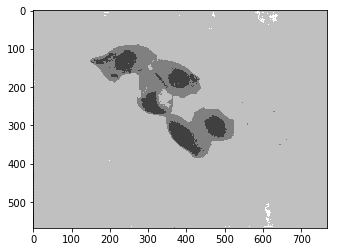

In [39]:
plt.imshow(quant_images[4], cmap='gray')

In [40]:
quant_hist_total_time = end_hist_quant - start_hist_quant
quant_hist_per_img = quant_hist_total_time / 499

print("Batch processing time: ", quant_hist_total_time)
print("Per image processing time: ", quant_hist_per_img)

Batch processing time:  383.5494567500002
Per image processing time:  0.7686361858717439


In [66]:
from sklearn.metrics import mean_squared_error

def mse_all(originals, quantized):
    all_mse = []
    for i in range(0, len(originals)):
        mse = mean_squared_error(originals[i], quantized[i])
        all_mse.append(mse)
        
    return all_mse

In [67]:
the_mse = mse_all(gray_images, quant_images)
print(the_mse)

[250.07964715375587, 129.19436344630282, 116.15774235255282, 96.43246588908453, 218.61931713981804, 280.85907469556923, 46.42511416153169, 165.9223564040493, 343.97784395173124, 259.892880721831, 201.6654631565434, 88.41938774574531, 221.16149959653754, 303.40115628667843, 217.88171902508805, 171.90571357834506, 220.80560216769368, 98.01548287118544, 186.11496387177226, 343.96482541079814, 165.99651555164317, 46.363398162411976, 228.47582893192487, 277.5922186766432, 56.81006547095071, 100.23993407056925, 219.51588862602702, 259.4600984815141, 198.87157515404928, 296.6487263424296, 225.9773694248826, 51.228263460974176, 240.99203161678406, 106.13019457893192, 210.99053467943077, 40.70082801496479, 218.56896456866198, 204.10913659037556, 240.38724600205398, 278.7233898180751, 323.2090462698064, 84.55784184272301, 70.07749000513498, 91.54698274281104, 223.26147346317487, 205.41424359961857, 194.2293202574824, 115.96540080325703, 206.97580600792253, 50.07564691534625, 218.66064911605045, 

## Filtering: Linear Filter with User-Specified Mask Size and Pixel Weights

In [72]:
def normalize_img(image):
    if type(image) != np.ndarray:
        img = np.array(image)
        
    min_value = img.min()
    max_value = img.max()
    normalized = ((img - min_value) * 255) / (max_value - min_value)
    normalized = normalized.astype(int)
    return normalized

In [73]:
def linear_filter(image, radius, weights):
    ### need to take edges into account
    img = []
    num_pixels = len(weights) * len(weights[0])
    
    for x in range(0, len(image)):              # for x in range (0,568)
        row = []
        for y in range(0, len(image[0])):          # for y in range (0,768)
            if (x-radius+1 < 0) or (x+radius-1 >= len(image)) or (y-radius+1 < 0) or (y+radius-1 >= len(image[0])):
                continue
            
            # go through the filter            
            start_x = x - radius + 1
            start_y = y - radius + 1
            new_pixel = 0
            
            for i in range(0, len(weights)):
                for e in range(0, len(weights[0])):
                    image_value = image[start_x + i][start_y + e]
                    filter_value = filter[i][e]
                    
                    new_pixel += (image_value * filter_value)

            new_pixel = int(new_pixel / num_pixels)
            row.append(new_pixel)
        if len(row) > 0:
            img.append(row)
            
    #normalize
    img = normalize_img(img)
    
    
    return img

In [74]:
###### NOTE: radius indludes the middle block ######
def lin_filter_all(images, radius, weights):
    filtered_images = []
    for i in range(0, len(images)):
        filtered_images.append(linear_filter(images[i], radius, weights))
    return filtered_images

In [75]:
filter = []
filter.append([1,1,7])
filter.append([0,0,8])
filter.append([0,0,4])

start_linear = time.perf_counter()
lin_filter_images = lin_filter_all(gray_images, 2, filter)
end_linear = time.perf_counter()

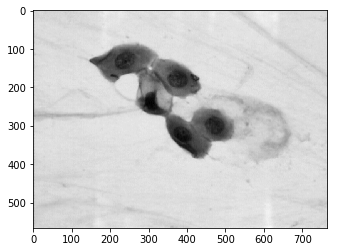

In [76]:
plt.imshow(lin_filter_images[4], cmap='gray')

In [78]:
linear_total_time = end_linear - start_linear
linear_per_img = linear_total_time / 499

print("Batch processing time: ", linear_total_time)
print("Per image processing time: ", linear_per_img)

Batch processing time:  1296.5471304120001
Per image processing time:  2.598290842509018


## Filtering: Median Filter with User-Specified Mask Size and Pixel Weights

In [85]:
import statistics

def med_filter(image, radius, weights):
    img = []
    
    for x in range(0, len(image)):              # for x in range (0,568)
        row = []
        for y in range(0, len(image[0])):          # for y in range (0,768)
            # if out of bounds.... continue #
            if (x-radius+1 < 0) or (x+radius-1 >= len(image)) or (y-radius+1 < 0) or (y+radius-1 >= len(image[0])):
                continue
            
            # go through the filter            
            start_x = x - radius + 1
            start_y = y - radius + 1
            new_pixel = 0
            weighted_list = []
            
            for i in range(0, len(weights)):
                for e in range(0, len(weights[0])):
                    image_value = image[start_x + i][start_y + e]
                    filter_value = filter[i][e]
                    
                    for i in range(0, filter_value):
                        weighted_list.append(image_value)

            new_pixel = statistics.median(weighted_list)
            row.append(new_pixel)
        if len(row) > 0:
            img.append(row)
    
    return img

In [86]:
def med_filter_all(images, radius, weights):
    median_images = []
    for i in range(0, len(images)):
        median_images.append(med_filter(images[i], radius, weights))
    return median_images

In [87]:
filter = []
filter.append([1,1,1])
filter.append([1,1,1])
filter.append([1,1,1])

start_median = time.perf_counter()
median_images = med_filter_all(gray_images, 2, filter)
end_median = time.perf_counter()

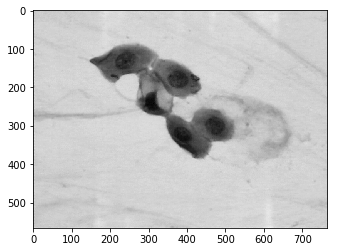

In [88]:
plt.imshow(median_images[4], cmap='gray')

In [89]:
median_total_time = end_median - start_median
median_per_img = median_total_time / 499

print("Batch processing time: ", median_total_time)
print("Per image processing time: ", median_per_img)

Batch processing time:  2819.1760857590007
Per image processing time:  5.6496514744669355
